# Exercício - Processo Completo de Machine Learning

Exercício desenvolvido no curso Formação Cientista de Dados da DataScience Academy (https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados)
LinkedIn: https://www.linkedin.com/in/carlos-carvalho-93204b13/


Aplicação de todo o processo de análise e utilização de um algoritmo de Machine Learning
- Definição do problema de negócio;
- Extração e carregamento dos dados;
- Análise exploratória;
- Visualização dos dados;
- Normalização;
- Padronização;
- Feature Selection;
- Escolha do algoritmo através da acurácia; 
- Cross validation;


In [1]:
from IPython.display import Image
Image(url = 'images/processo.png')

### Definição do Problema de Negócio

Vamos criar um modelo preditivo que seja capaz de prever se uma pessoa pode ou não desenvolver diabetes. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo.

Dataset: Pima Indians Diabetes Data Set http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes.

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

## Extraindo e Carregando os Dados

In [2]:
from pandas import read_csv
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


### Análise Exploratória dos Dados
#### Estatística Descritiva

In [3]:
# Visualizando as 20 primeiras linas
dados.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Visualização do tipo de dados
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [5]:
# Sumário estatístico
dados.describe()
# Tem alguém com IMC = 0 ?

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Contagem de valores em cada classe.  Quantas pessoas tiveram diabetes e quantas não tiveram?
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

In [7]:
# Correlação Pearson
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
# Verificação da simetria dos dados
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## Visualização dos Dados
### Utilização do Matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

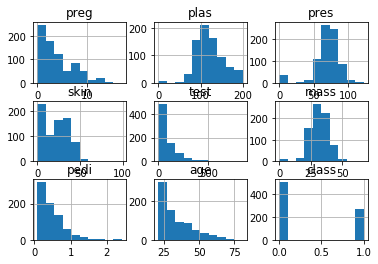

In [10]:
# Histograma Univariado
dados.hist()
plt.show()

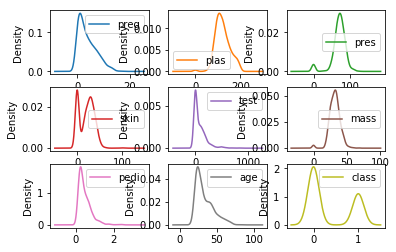

In [11]:
# Density plots univariados
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

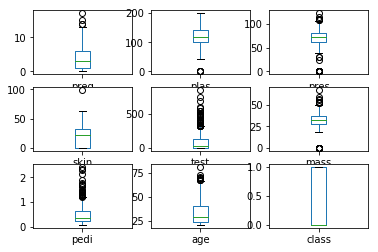

In [12]:
# Box and Whisker plots
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

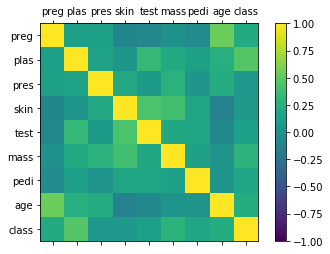

In [13]:
# Matriz de correlação com os nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

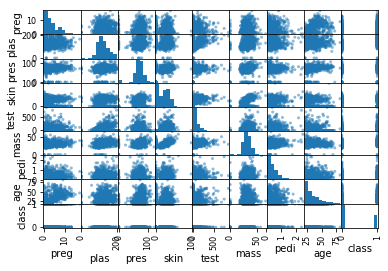

In [14]:
# Scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

### Utilização do Seaborn

In [15]:
import seaborn as sns

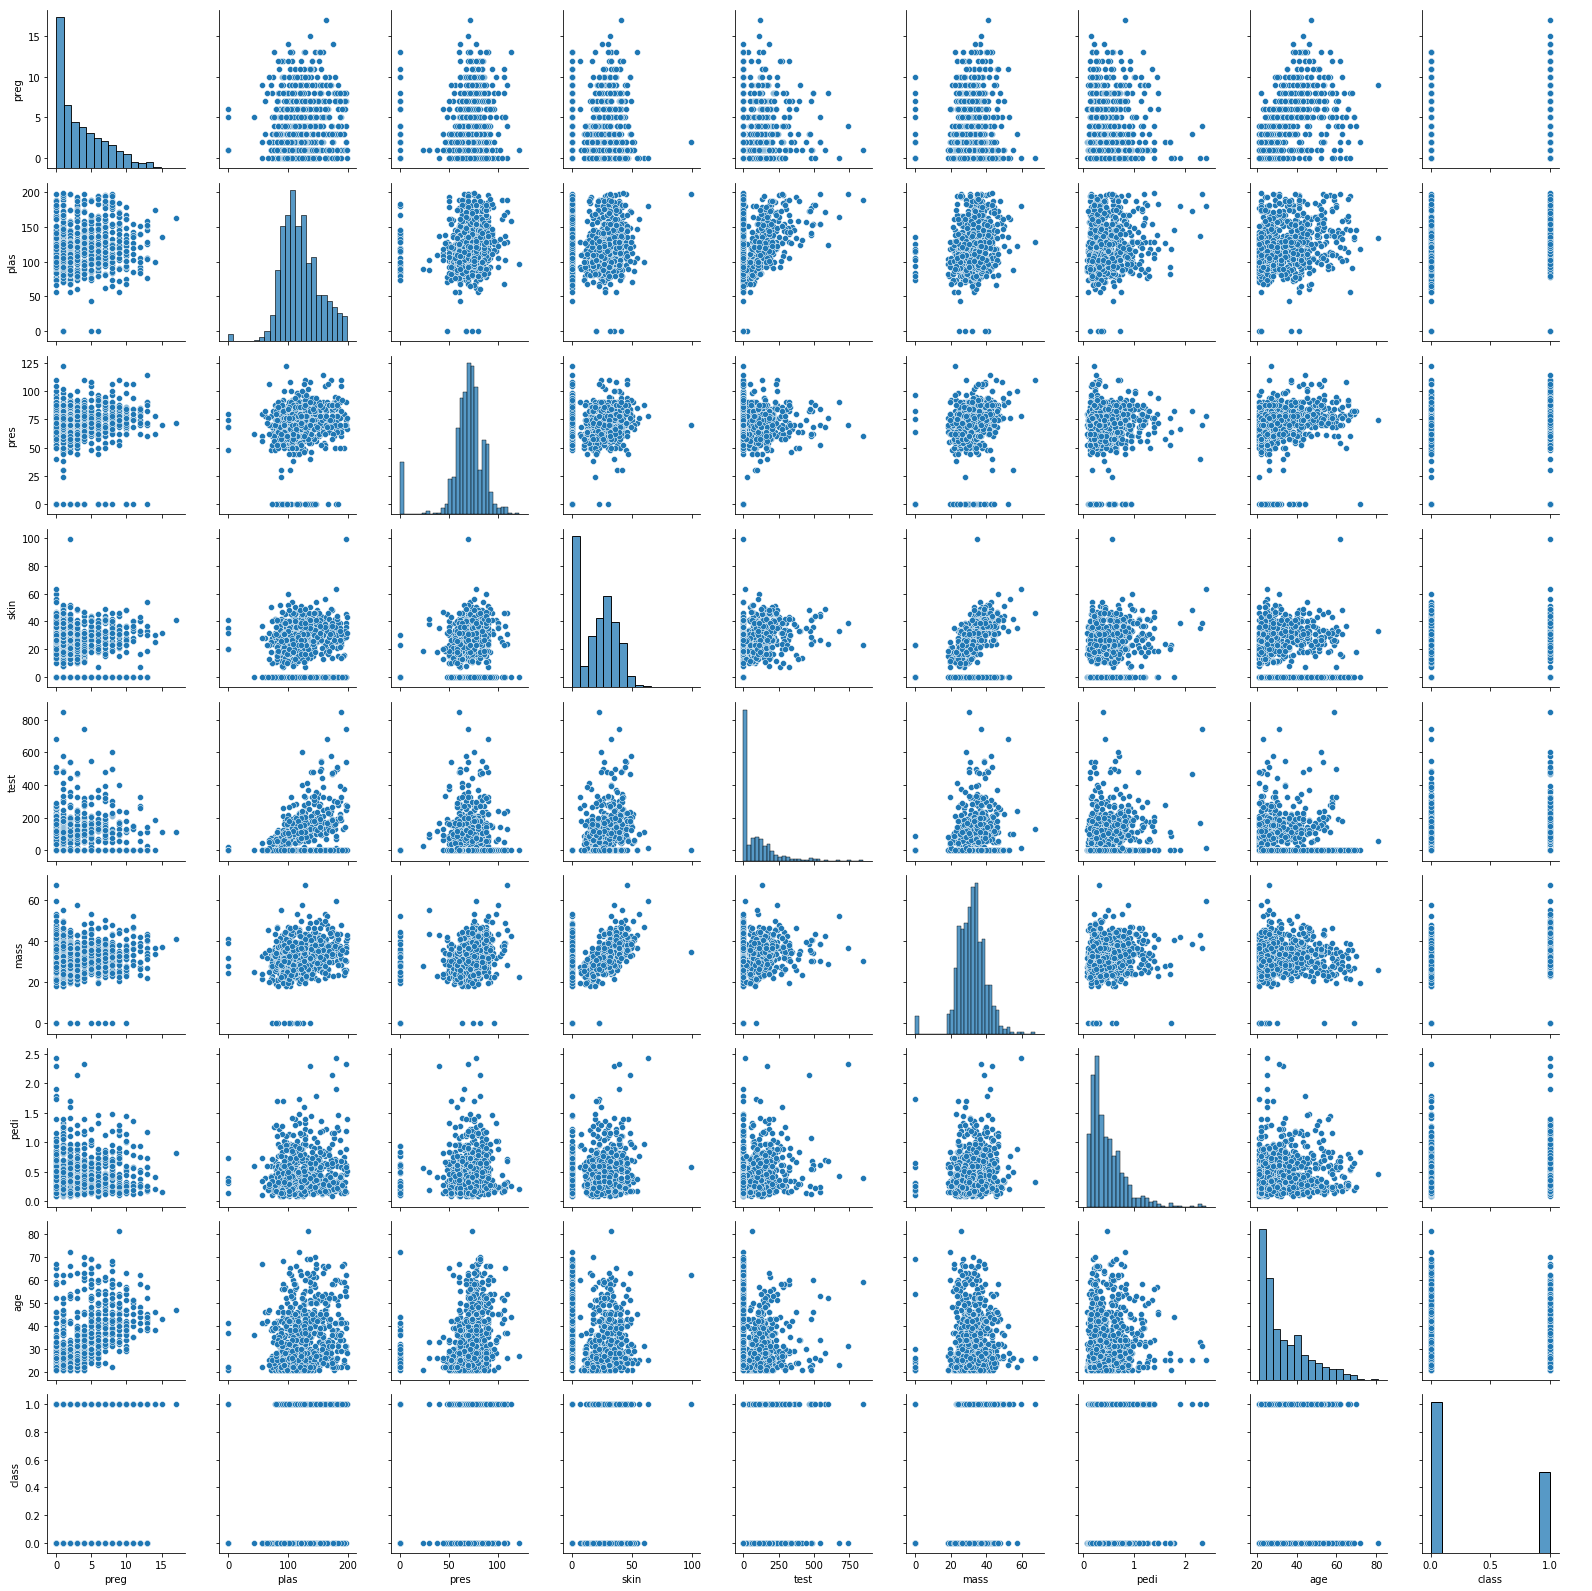

In [16]:
# Pairplot
sns.pairplot(dados)

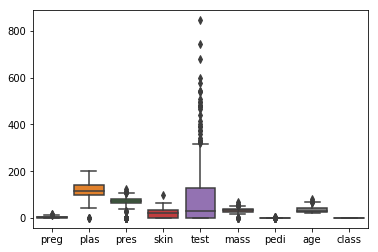

In [17]:
# Boxplot com orientação vertical
sns.boxplot(data = dados, orient = 'v')

In [18]:
dados.describe

<bound method NDFrame.describe of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Carlos\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Carlos\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Carlos\AppData\Roaming\Python\Python37\site-pac

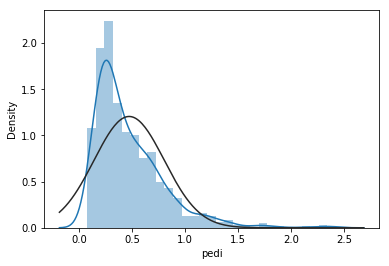

In [19]:
from scipy import stats
sns.distplot(dados.pedi, fit = stats.norm)

## Normalização

In [21]:
from sklearn.preprocessing import Normalizer

array = dados.values

# Separando os dados em input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados
print("Dados originais: \n\n",dados.values)
print("\n Dados normalizados: \n\n", normalizedX[0:5,:])

Dados originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

 Dados normalizados: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Padronização

In [22]:
# Padronizando os dados (média igual a 0 e desvio padrão igual a 1)

from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
scaler = StandardScaler().fit(normalizedX)
standardX = scaler.transform(normalizedX)

# Sumarizando os dados
print("Dados originais: \n\n", dados.values)
print("\n Dados padronizados: \n\n", standardX[0:5,:])

Dados originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

 Dados padronizados: 

 [[ 5.20814832e-01  8.98555394e-01 -1.12692911e-03  9.04313359e-01
  -9.42579006e-01  1.60888270e-02  4.18945304e-01  1.04056668e+00]
 [-6.79051691e-01  2.05743222e-01  9.99053385e-01  1.42951932e+00
  -9.42579006e-01  5.87188955e-01  1.29834064e-01  8.12361963e-01]
 [ 8.47674958e-01  1.49753375e+00 -5.19276856e-01 -1.21193266e+00
  -9.42579006e-01 -1.09240837e+00  3.59577028e-01 -4.18398279e-01]
 [-7.65574287e-01 -5.86337027e-01  2.19074550e-01  4.32387464e-01
   8.94358521e-01 -1.69959671e-02 -8.45077980e-01 -6.99514826e-01]
 [-1.08129354e+00 -5.37169649e-01 -1.49140132e+00  4.35475801e-01
   1.21889753e+00  1.

## Algoritmos de Classificação

### Regressão Logística

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [24]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

X = standardX

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [25]:
# Print do resultado
print("Acurácia: %.3f" % (resultado.mean()*100))

Acurácia: 66.143


### Linear Discriminatn Analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

X = standardX

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean()*100))

Acurácia: 65.882


### KNN - K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo
modelo = KNeighborsClassifier()

X = standardX

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 65.882


### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, standardX, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 64.315


### CART - Classification and Regression Tress

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, standardX, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 64.325


### SVM - Support Vector Machine

In [32]:
from sklearn.svm import SVC

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = SVC()

# Cross Validation
resultado = cross_val_score(modelo, standardX, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Acurácia: 68.621


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### XGBoost

In [34]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Definindo o tamanho dos dados de treino e teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(standardX, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Print do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(Y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=2, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)
Acurácia: 68.90%


## Salvando o modelo

In [35]:
import pickle 

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!
